In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url_confirmed = pd.read_csv("./time_series_covid19_confirmed_global.csv")
url_deaths = pd.read_csv("./time_series_covid19_deaths_global.csv")
url_recovered = pd.read_csv("./time_series_covid19_recovered_global.csv")

In [2]:
confirmed = url_confirmed
deaths = url_deaths
recovered = url_recovered

In [3]:
# Inspect the data for confirmed cases
print(confirmed.head())
print(confirmed.info())
print(confirmed.describe())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [4]:
# Inspect the data for deaths
print(deaths.head())
print(deaths.info())
print(deaths.describe())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896   

In [5]:
# Inspect the data for recovered cases
print(recovered.head())
print(recovered.info())
print(recovered.describe())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...        0       0       0       0   
1        0        0        0        0  ...        0       0       0       0   
2        0        0        0        0  ...        0       0       0       0   
3        0        0        0        0  ...        0       0       0       0   
4        0        0        0        0  ...        0       0       0       0   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0       0       0       0   

In [6]:
# melt the data for confirmed cases
confirmed_melt = confirmed.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
                                var_name="Date", value_name="Confirmed")
print(confirmed_melt.head())

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0


In [10]:
# melt the data for deaths
deaths_melt = deaths.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],                  
                            var_name="Date", value_name="Deaths")
print(deaths_melt.head())

  Province/State Country/Region       Lat       Long     Date  Deaths
0            NaN    Afghanistan  33.93911  67.709953  1/22/20       0
1            NaN        Albania  41.15330  20.168300  1/22/20       0
2            NaN        Algeria  28.03390   1.659600  1/22/20       0
3            NaN        Andorra  42.50630   1.521800  1/22/20       0
4            NaN         Angola -11.20270  17.873900  1/22/20       0


In [11]:
# melt the data for recovered
recovered_melt = recovered.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
                                var_name="Date", value_name="Recovered")
print(recovered_melt.head())


  Province/State Country/Region       Lat       Long     Date  Recovered
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0


In [12]:
# convert the Date column to datetime
confirmed_melt["Date"] = pd.to_datetime(confirmed_melt["Date"])
deaths_melt["Date"] = pd.to_datetime(deaths_melt["Date"])
recovered_melt["Date"] = pd.to_datetime(recovered_melt["Date"])

# check for missing values
print(confirmed_melt.isnull().sum())
print(deaths_melt.isnull().sum())
print(recovered_melt.isnull().sum())


C:\Users\Dell\AppData\Local\Temp\ipykernel_5724\3220497686.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_melt["Date"] = pd.to_datetime(deaths_melt["Date"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_5724\3220497686.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_melt["Date"] = pd.to_datetime(recovered_melt["Date"])


Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
Date                   0
Confirmed              0
dtype: int64
Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
Date                   0
Deaths                 0
dtype: int64
Province/State    227457
Country/Region         0
Lat                 1143
Long                1143
Date                   0
Recovered              0
dtype: int64


In [13]:
# Aggregate date by Dat
confirmed_by_date_agg = confirmed_melt.groupby("Date")["Confirmed"].sum().reset_index()
deaths_by_date_agg = deaths_melt.groupby("Date")["Deaths"].sum().reset_index()
recovered_by_date_agg = recovered_melt.groupby("Date")["Recovered"].sum().reset_index()

print(confirmed_by_date_agg.head())
print(deaths_by_date_agg.head())
print(recovered_by_date_agg.head())

        Date  Confirmed
0 2020-01-22        557
1 2020-01-23        657
2 2020-01-24        944
3 2020-01-25       1437
4 2020-01-26       2120
        Date  Deaths
0 2020-01-22      17
1 2020-01-23      18
2 2020-01-24      26
3 2020-01-25      42
4 2020-01-26      56
        Date  Recovered
0 2020-01-22         30
1 2020-01-23         32
2 2020-01-24         39
3 2020-01-25         42
4 2020-01-26         56


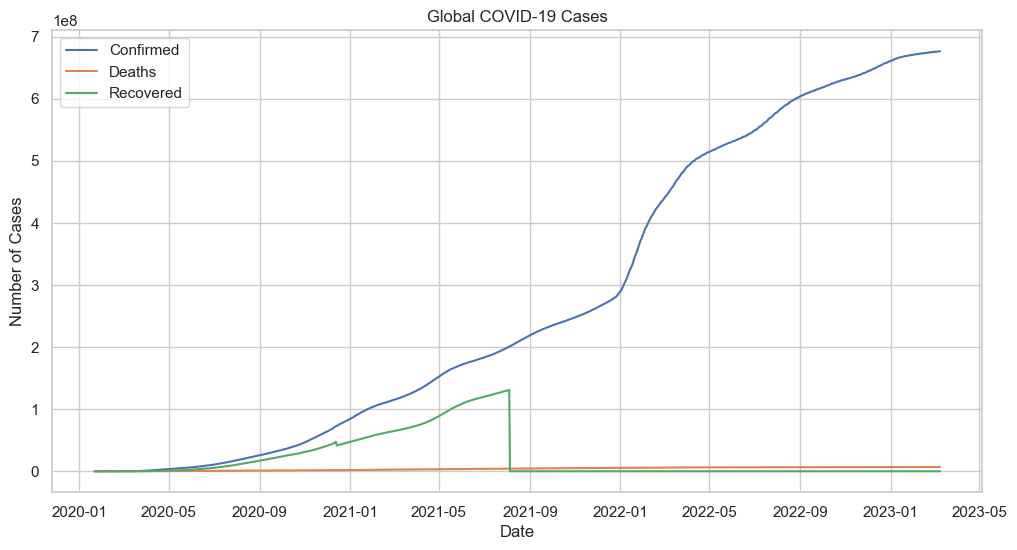

In [14]:
# plot the data
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_by_date_agg, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=deaths_by_date_agg, x="Date", y="Deaths", label="Deaths")
sns.lineplot(data=recovered_by_date_agg, x="Date", y="Recovered", label="Recovered")
plt.title("Global COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

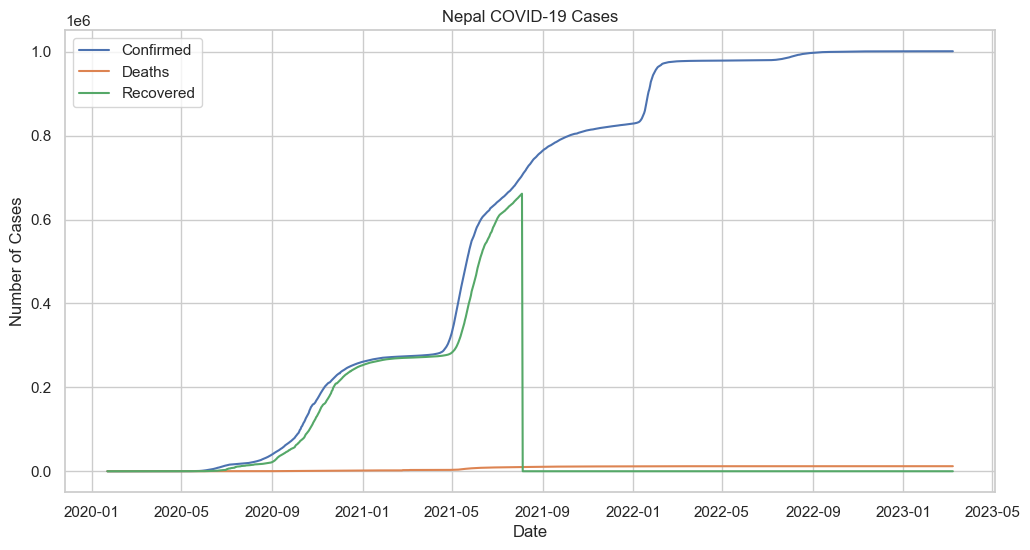

In [15]:
# specific country
country = "Nepal"
confirmed_country = confirmed_melt[confirmed_melt["Country/Region"] == country].groupby("Date")["Confirmed"].sum().reset_index()
deaths_country = deaths_melt[deaths_melt["Country/Region"] == country].groupby("Date")["Deaths"].sum().reset_index()
recovered_country = recovered_melt[recovered_melt["Country/Region"] == country].groupby("Date")["Recovered"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_country, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=deaths_country, x="Date", y="Deaths", label="Deaths")
sns.lineplot(data=recovered_country, x="Date", y="Recovered", label="Recovered")
plt.title(f"{country} COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


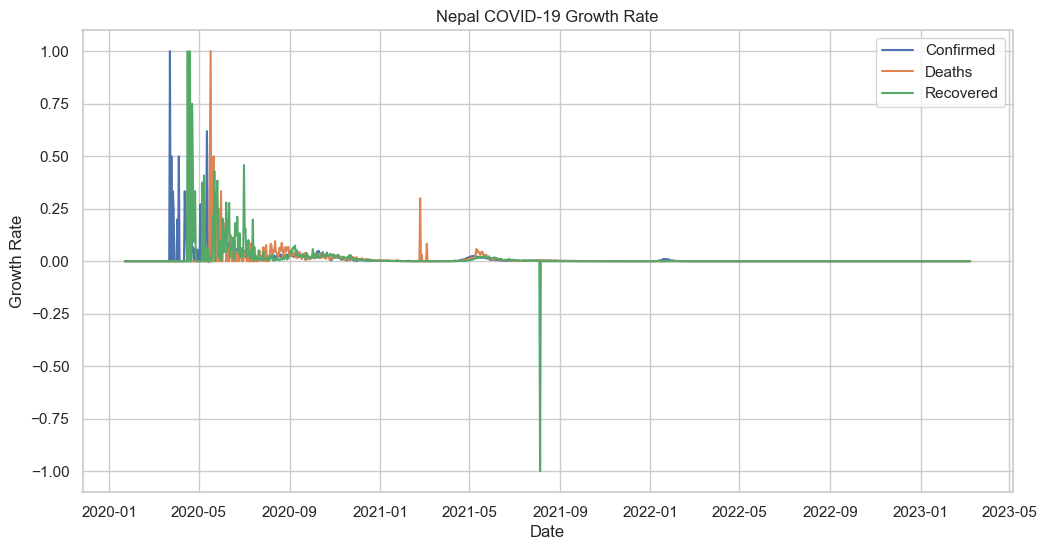

In [16]:
# calculate growth rate of country
confirmed_country["Growth Rate"] = confirmed_country["Confirmed"].pct_change().fillna(0)
deaths_country["Growth Rate"] = deaths_country["Deaths"].pct_change().fillna(0)
recovered_country["Growth Rate"] = recovered_country["Recovered"].pct_change().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=confirmed_country, x="Date", y="Growth Rate", label="Confirmed")
sns.lineplot(data=deaths_country, x="Date", y="Growth Rate", label="Deaths")
sns.lineplot(data=recovered_country, x="Date", y="Growth Rate", label="Recovered")
plt.title(f"{country} COVID-19 Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()





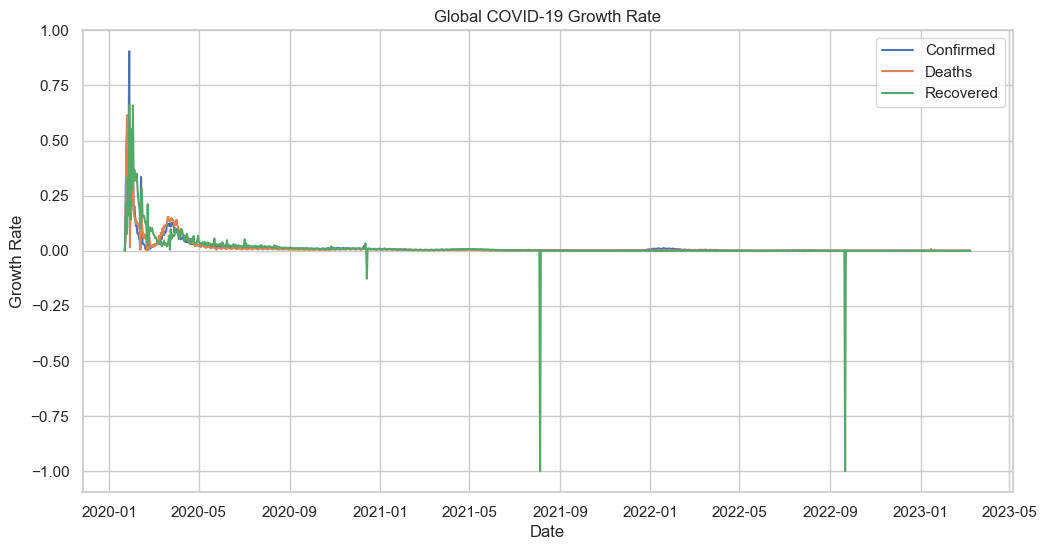

In [17]:
# calculate growth rate of global
confirmed_by_date_agg["Growth Rate"] = confirmed_by_date_agg["Confirmed"].pct_change().fillna(0)
deaths_by_date_agg["Growth Rate"] = deaths_by_date_agg["Deaths"].pct_change().fillna(0)
recovered_by_date_agg["Growth Rate"] = recovered_by_date_agg["Recovered"].pct_change().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data = confirmed_by_date_agg, x="Date", y="Growth Rate", label="Confirmed")
sns.lineplot(data = deaths_by_date_agg, x="Date", y="Growth Rate", label="Deaths")
sns.lineplot(data = recovered_by_date_agg, x="Date", y="Growth Rate", label="Recovered")
plt.title("Global COVID-19 Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()


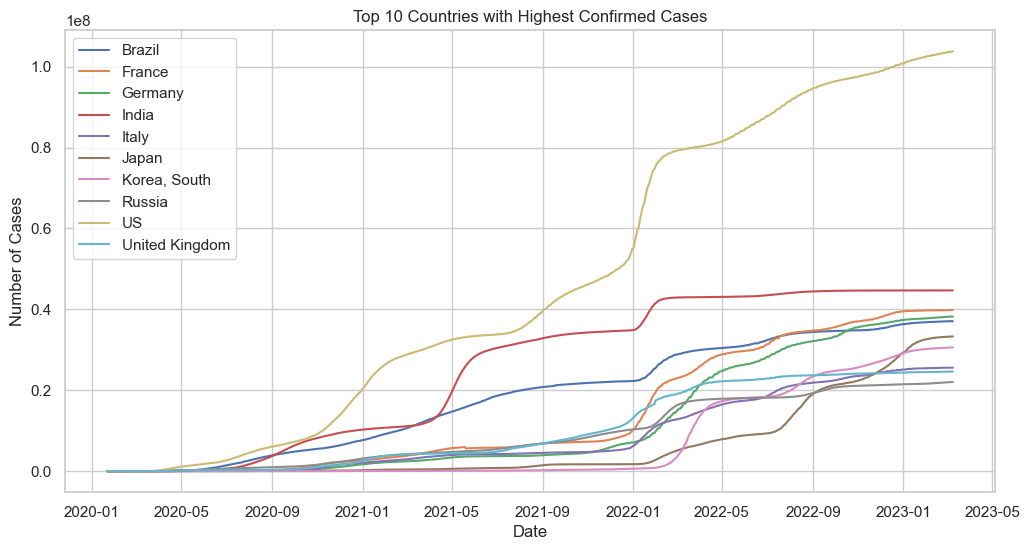

In [18]:
# top 10 countries with highest confirmed cases
top_10_countries = confirmed_melt.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(10).index
top_10_countries_confirmed = confirmed_melt[confirmed_melt["Country/Region"].isin(top_10_countries)]
top_10_countries_confirmed = top_10_countries_confirmed.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries_confirmed, x="Date", y="Confirmed", hue="Country/Region")
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


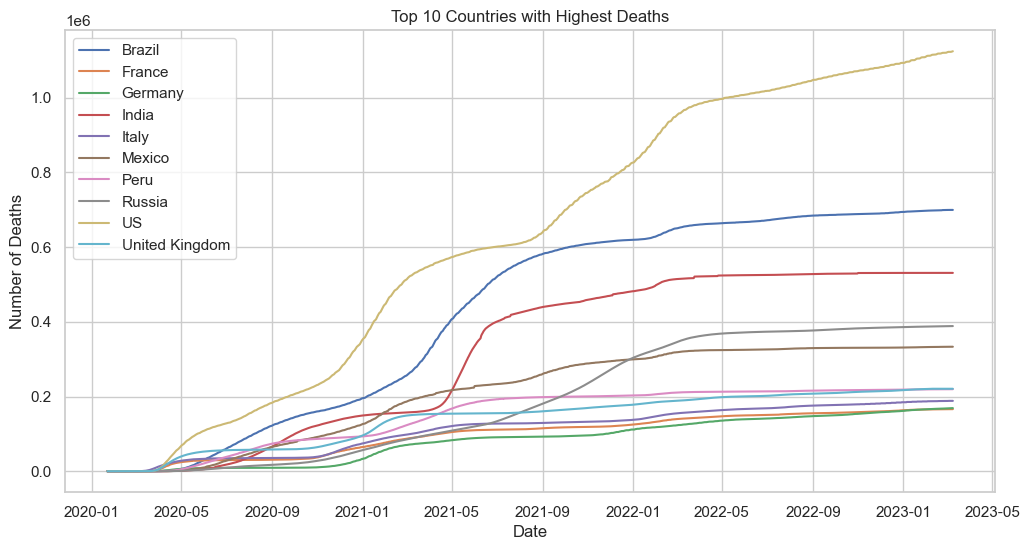

In [19]:
# top 10 countries with highest deaths

top_10_countries = deaths_melt.groupby("Country/Region")["Deaths"].max().sort_values(ascending=False).head(10).index
top_10_countries_deaths = deaths_melt[deaths_melt["Country/Region"].isin(top_10_countries)]
top_10_countries_deaths = top_10_countries_deaths.groupby(["Country/Region", "Date"])["Deaths"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries_deaths, x="Date", y="Deaths", hue="Country/Region")
plt.title("Top 10 Countries with Highest Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()


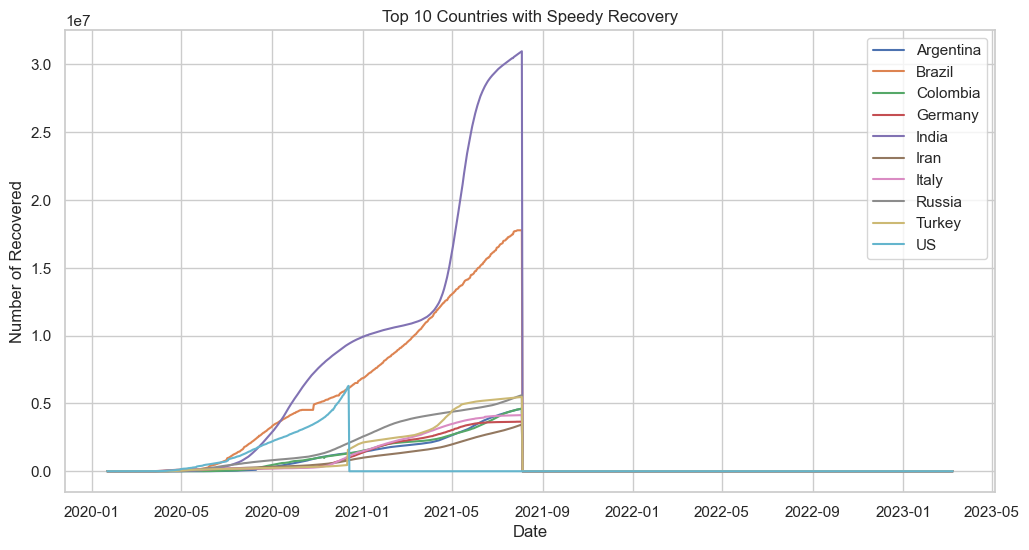

In [20]:
# top 10 countries with speedy recovery

top_10_countries = recovered_melt.groupby("Country/Region")["Recovered"].max().sort_values(ascending=False).head(10).index
top_10_countries_recovered = recovered_melt[recovered_melt["Country/Region"].isin(top_10_countries)]
top_10_countries_recovered = top_10_countries_recovered.groupby(["Country/Region", "Date"])["Recovered"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries_recovered, x="Date", y="Recovered", hue="Country/Region")
plt.title("Top 10 Countries with Speedy Recovery")
plt.xlabel("Date")
plt.ylabel("Number of Recovered")
plt.legend()
plt.show()


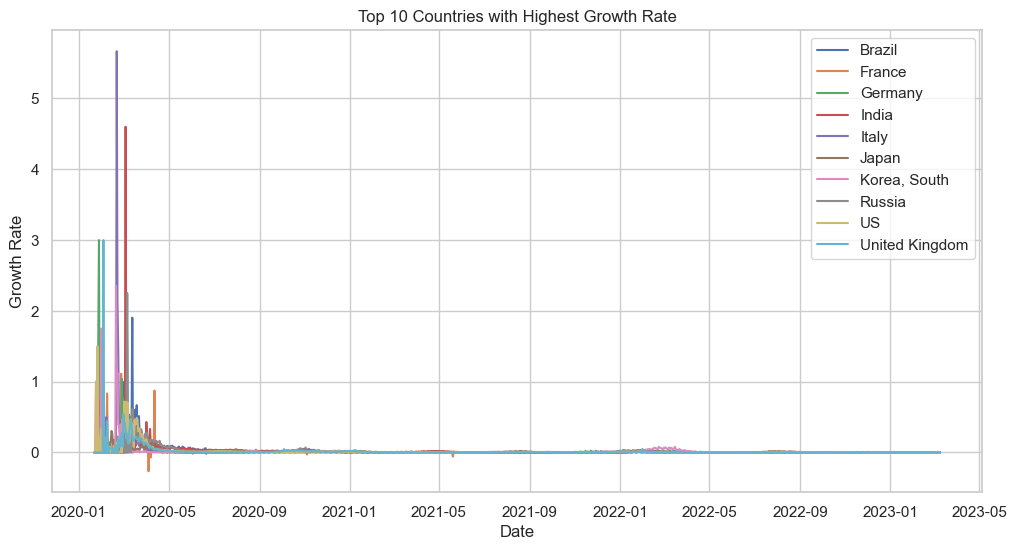

In [21]:
# top 10 countries with highest growth rate

top_10_countries = confirmed_melt.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(10).index
top_10_countries_confirmed = confirmed_melt[confirmed_melt["Country/Region"].isin(top_10_countries)]
top_10_countries_confirmed = top_10_countries_confirmed.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()
top_10_countries_confirmed["Growth Rate"] = top_10_countries_confirmed.groupby("Country/Region")["Confirmed"].pct_change().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries_confirmed, x="Date", y="Growth Rate", hue="Country/Region")
plt.title("Top 10 Countries with Highest Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()


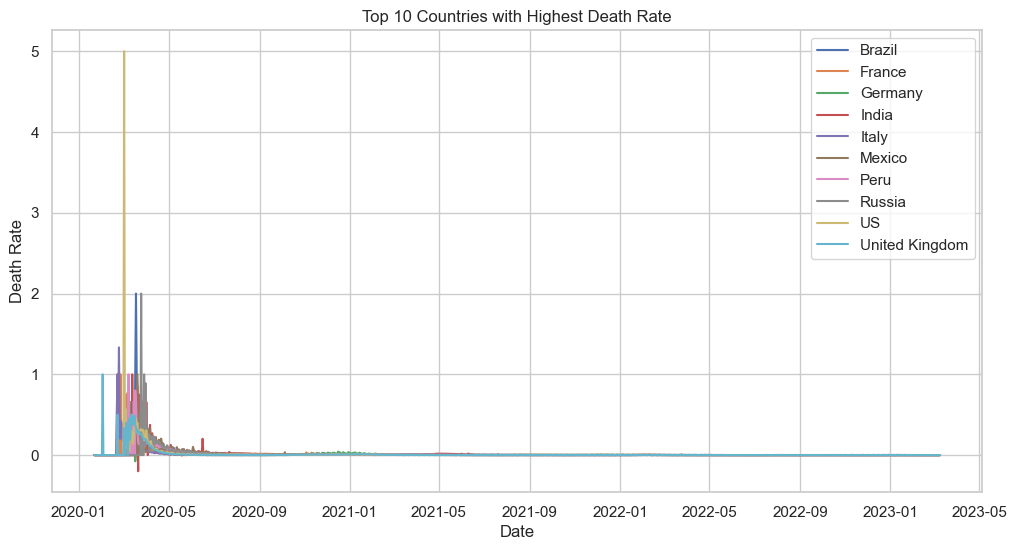

In [22]:
# top 10 countries with highest death rate

top_10_countries = deaths_melt.groupby("Country/Region")["Deaths"].max().sort_values(ascending=False).head(10).index
top_10_countries_deaths = deaths_melt[deaths_melt["Country/Region"].isin(top_10_countries)]
top_10_countries_deaths = top_10_countries_deaths.groupby(["Country/Region", "Date"])["Deaths"].sum().reset_index()
top_10_countries_deaths["Death Rate"] = top_10_countries_deaths.groupby("Country/Region")["Deaths"].pct_change().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries_deaths, x="Date", y="Death Rate", hue="Country/Region")
plt.title("Top 10 Countries with Highest Death Rate")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


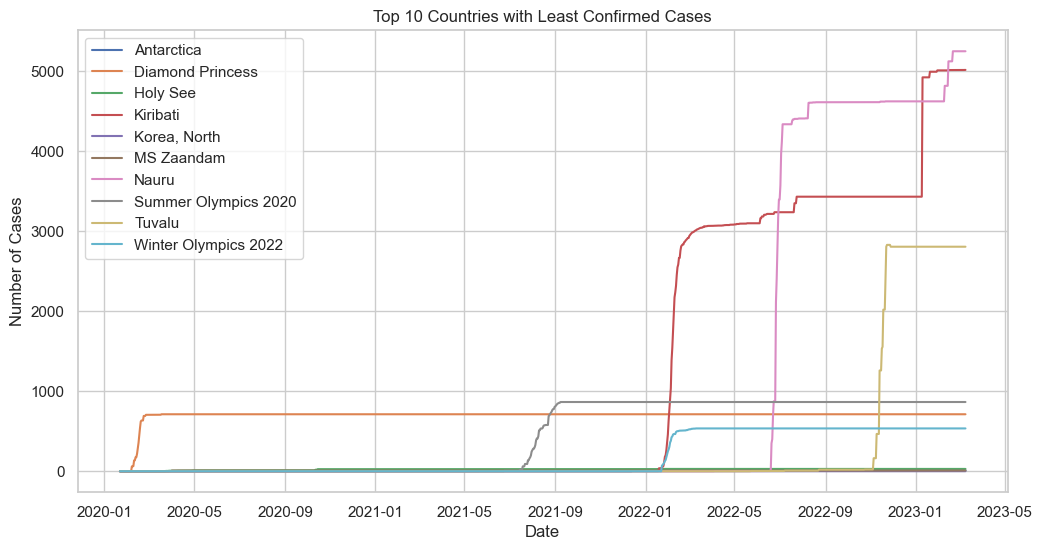

In [23]:
# top 10 countries with least confirmed cases
least_10_countries = confirmed_melt.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=True).head(10).index
least_10_countries_confirmed = confirmed_melt[confirmed_melt["Country/Region"].isin(least_10_countries)]
least_10_countries_confirmed = least_10_countries_confirmed.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=least_10_countries_confirmed, x="Date", y="Confirmed", hue="Country/Region")
plt.title("Top 10 Countries with Least Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


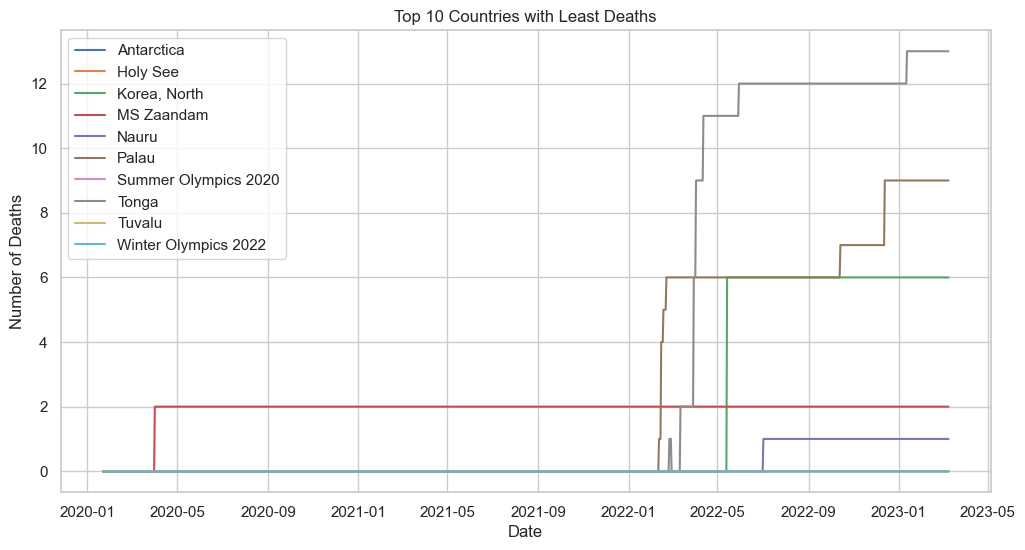

In [24]:
# top 10 countries with least deaths

least_10_countries = deaths_melt.groupby("Country/Region")["Deaths"].max().sort_values(ascending=True).head(10).index
least_10_countries_deaths = deaths_melt[deaths_melt["Country/Region"].isin(least_10_countries)]
least_10_countries_deaths = least_10_countries_deaths.groupby(["Country/Region", "Date"])["Deaths"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=least_10_countries_deaths, x="Date", y="Deaths", hue="Country/Region")
plt.title("Top 10 Countries with Least Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()

